# Ligand-receptor interaction inference

In this tutorial, we demonstrate the cell cell interaction based on ligand-receptor products conditioned on spatial proximity between clusters. This is done in the following three steps.

1. Find spatially adjacent clusters(celltypes);
2. Given two celltypes, find space-specific ligand-receptor pairs.
3. (Optional),Loop executes multiple two-cell type interactions.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spateo as st

2024-02-01 10:26:37.904158: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load data

We will be using a axolotl dataset from [Wei et al., 2022] (https://doi.org/10.1126/science.abp9444).

Here, we can get data directly from the function`st.sample.axolotl` or link: 

1. axolotl_2DPI: https://www.dropbox.com/s/7w2jxf41xazrqxo/axolotl_2DPI.h5ad?dl=1

2. axolotl_2DPI_right: https://www.dropbox.com/s/pm5vvqcd4leahsb/axolotl_2DPI_right.h5ad?dl=1

In [2]:
adata = st.sample_data.axolotl(filename='axolotl_2DPI.h5ad')
adata

|-----> Downloading data to ./data/axolotl_2DPI.h5ad


AnnData object with n_obs × n_vars = 7668 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', '__type', 'color_key'
    obsm: 'X_spatial', 'spatial'
    layers: 'counts', 'log1p'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

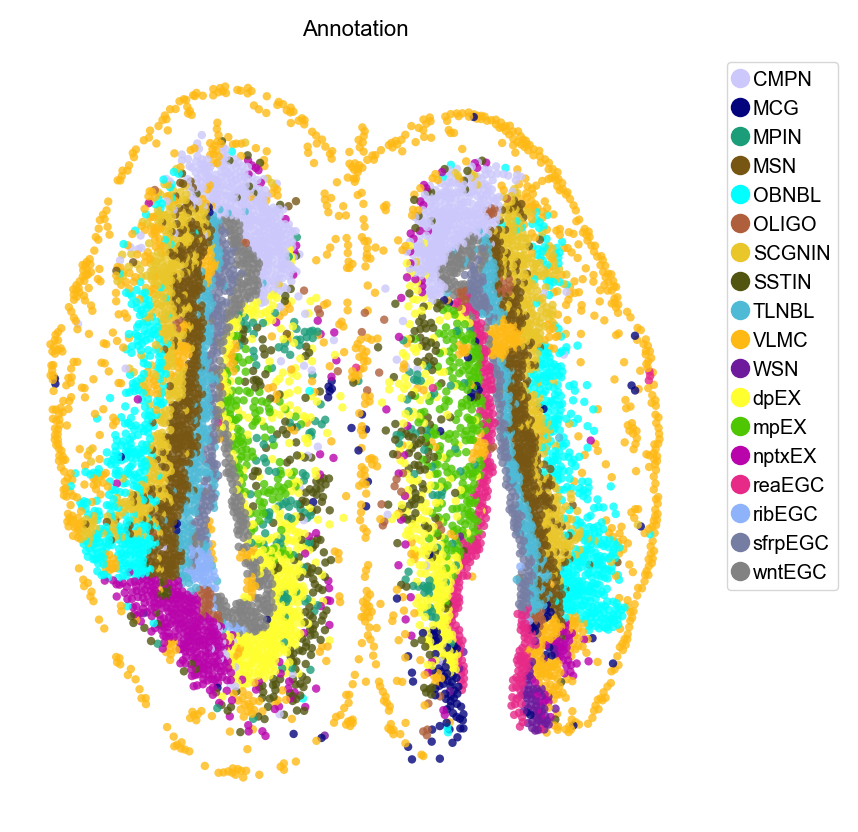

In [3]:
st.pl.space(adata,
            color=['Annotation'],
            pointsize=0.2,
            color_key=adata.uns['color_key'],
            show_legend='upper left',
            figsize=(5, 5))

## Find spatially adjacent celltypes

First, we calculate the weighted spatial graph between celltypes, which the nearest neighbor of a cell are based on the `fixed-neighbor` or `fixed-radius` methods. The spatial graphs and spatial distances are saves to `adata.obsp['spatial_distances']`,`adata.obsp['spatial_weights']`,`adata.obsp['spatial_connectivities']` ,`adata.uns['spatial_neighbors']`.

In [4]:
_, adata = st.tl.neighbors(
    adata,
    basis='spatial',
    spatial_key='spatial',
    n_neighbors=10
)

|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.


|-----> Filtering out cell types with fewer than 30 cells...
|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.
|-----> 
--- 18 labels, 7668 samples ---
initalized (19,) index ptr: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
initalized (7668,) indices: [0 0 0 ... 0 0 0]
initalized (7668,) data: [1 1 1 ... 1 1 1]

|-----> Deep copying AnnData object and working on the new copy. Original AnnData object will not be modified.
|-----> Matrix multiplying labels x weights x labels-transpose, shape (18, 7668) x (7668, 7668) x (7668, 18).


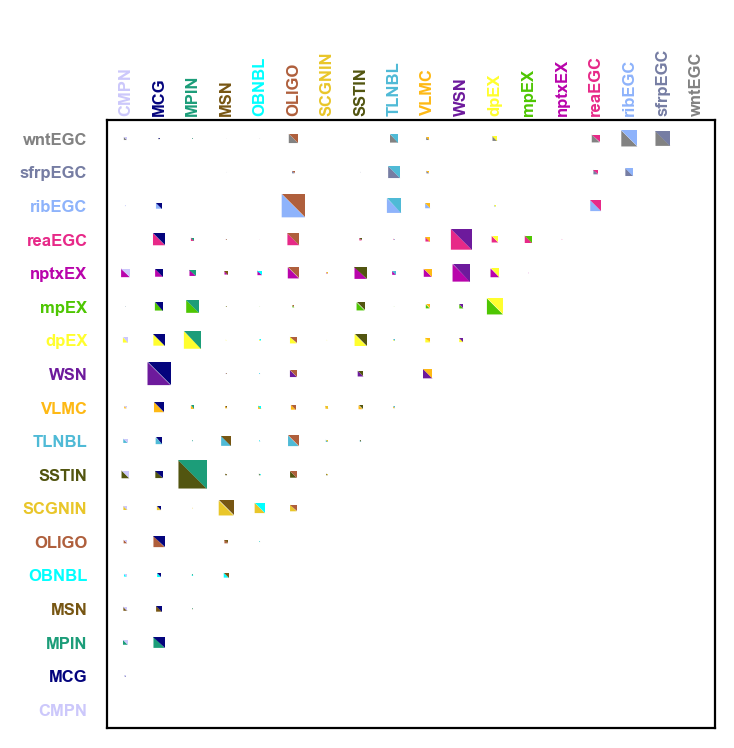

In [5]:
st.pl.plot_connections(
    adata,
    cat_key='Annotation',
    save_show_or_return='show',
    title_str=" ",
    title_fontsize=6,
    label_fontsize=6,
    colormap=adata.uns['color_key'],
    figsize=(4, 4),
)

## Given two celltypes, find space-specific ligand-receptor pairs.

Based on the result above, here we take the `reaEGC`(sender celltype) and `WSN`(receiver celltype) as an example.

In [6]:
adata = st.sample_data.axolotl(filename='axolotl_2DPI_right.h5ad')
adata

|-----> Downloading data to ./data/axolotl_2DPI_right.h5ad


AnnData object with n_obs × n_vars = 3625 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', '__type', 'color_key'
    obsm: 'X_pca', 'X_spatial', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [7]:
sender_ct = 'reaEGC'
receptor_ct = 'WSN'

## Plot cell type pair

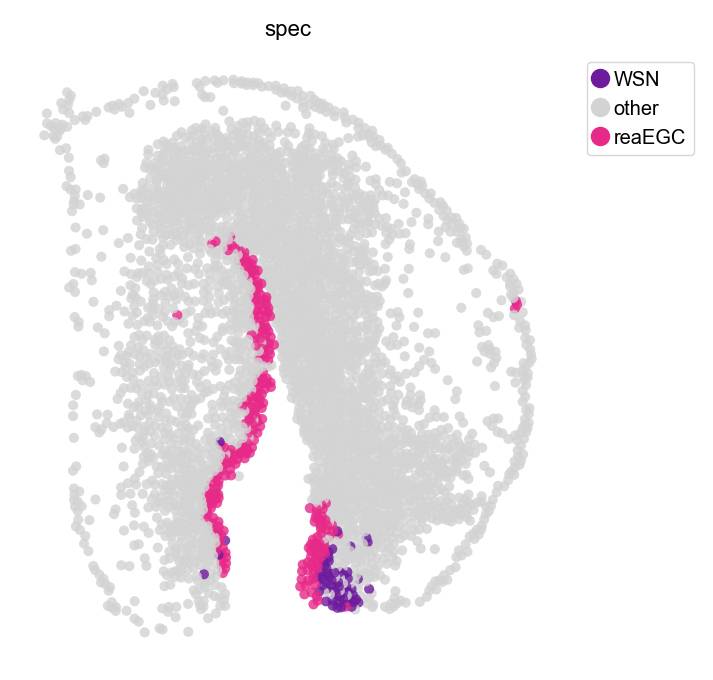

In [8]:
st.tl.prepare_cci_cellpair_adata(adata, sender_group=sender_ct,
                                 receiver_group=receptor_ct, group='Annotation', all_cell_pair=True)
# plot all cell pair
st.pl.space(adata,
            color=['spec'],
            pointsize=0.2,
            color_key={'other': '#D3D3D3', sender_ct: adata.uns['color_key']
                       [sender_ct], receptor_ct: adata.uns['color_key'][receptor_ct]},
            show_legend='upper left',
            figsize=(4, 4),
            save_show_or_return='show',
            #save_kwargs={"prefix": "./figures/left_2DPI_uninjury_cci_" + sender_ct + "_" + receptor_ct + "_all_cell_pair"}
            )

## Spatial ligand-receptor analysis

In [9]:
_, adata = st.tl.neighbors(
    adata,
    basis='spatial',
    spatial_key='spatial',
    n_neighbors=10
)

|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.


In [10]:
# Replace with your database path:
db_dir = "/mnt/c/users/danie/Desktop/Github/spateo-release/spateo/tools/database/"

In [11]:
res = st.tl.find_cci_two_group(adata,
                               path=db_dir,
                               species='axolotl',
                               group='Annotation',
                               sender_group=sender_ct,
                               receiver_group=receptor_ct,
                               filter_lr='outer',
                               min_pairs=0,
                               min_pairs_ratio=0,
                               top=20,)

|-----> 20 ligands for cell type reaEGC_prox with highest fraction of prevalence: ['AMEX60DD001392', 'AMEX60DD006146', 'AMEX60DD034565', 'AMEX60DD049502', 'AMEX60DD038105', 'AMEX60DD028699', 'AMEX60DD006363', 'AMEX60DD055544', 'AMEX60DD006229', 'AMEX60DD029944', 'AMEX60DD040253', 'AMEX60DD008951', 'AMEX60DD042911', 'AMEX60DD024888', 'AMEX60DD004095', 'AMEX60DD013396', 'AMEX60DD011644', 'AMEX60DD050822', 'AMEX60DD025240', 'AMEX60DD035775']. Testing interactions involving these genes.


/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:183: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:207: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type WSN_prox with highest fraction of prevalence: ['AMEX60DD027855', 'AMEX60DD051542', 'AMEX60DD033799', 'AMEX60DD049635', 'AMEX60DD014152', 'AMEX60DD029894', 'AMEX60DD051881', 'AMEX60DD055551', 'AMEX60DD055467', 'AMEX60DD055675', 'AMEX60DD055776', 'AMEX60DD033101', 'AMEX60DD009754', 'AMEX60DD036540', 'AMEX60DDU001005617', 'AMEX60DD018191', 'AMEX60DD029326', 'AMEX60DD008017', 'AMEX60DD052078', 'AMEX60DD029929']. Testing interactions involving these genes.


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 157.93it/s]


## Plot neighbors with the given cell type designations

(None, [<AxesSubplot:title={'center':'spec'}>])

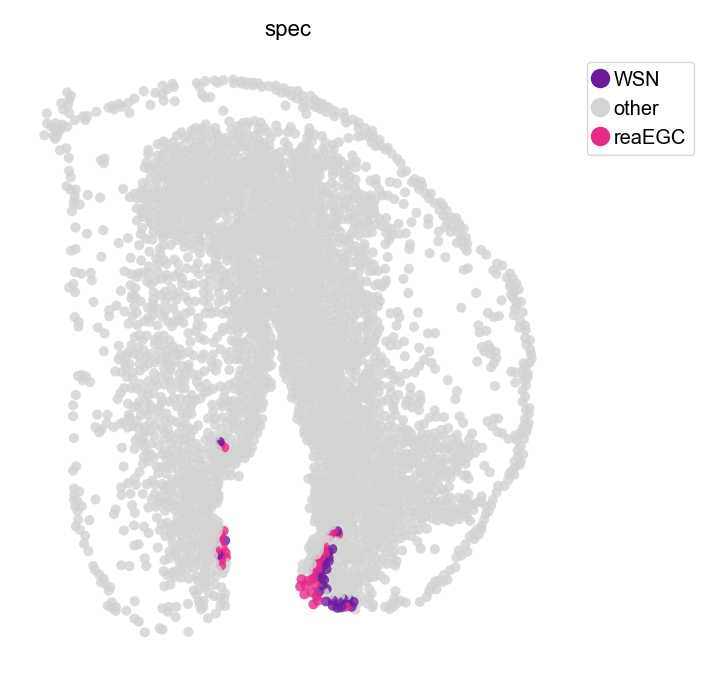

In [12]:
st.tl.prepare_cci_cellpair_adata(
    adata, sender_group=sender_ct, receiver_group=receptor_ct, cci_dict=res, all_cell_pair=False)
# plot
st.pl.space(adata,
            color=['spec'],
            pointsize=0.2,
            color_key={'other': '#D3D3D3', sender_ct: adata.uns['color_key']
                       [sender_ct], receptor_ct: adata.uns['color_key'][receptor_ct]},
            show_legend='upper left',
            figsize=(4, 4),
            save_show_or_return='return',
            #save_kwargs={"prefix": "./figures/left_2DPI_uninjury_cci_" + sender_ct + "_" + receptor_ct + "_cell_pair"}
            )

## Plot heatmap : significant ligand-receptor pairs

From `st.tl.find_cci_two_group`, we can get significant LR pairs specific to sender and receiver celltypes, `res['lr_pair']`, with columns are `lr_co_exp_num`, the number of cell-pairs co-expressed liagnd(expressed in sender cell type) and receptor(expressed in receiver cell type). `lr_co_exp_ratio`,Co-expressed cell-pairs account for all the paired cells.`lr_co_exp_ratio_pvalue`,p value of the LR pairs from permutation test, `lr_co_exp_ratio_qvalue`,FDR value. Here we use heatmap to show the LR pairs.

In [13]:
df = res['lr_pair']
df = df.loc[df['lr_co_exp_num'] > 0].sort_values(
    'lr_co_exp_ratio', ascending=False)[0:10]

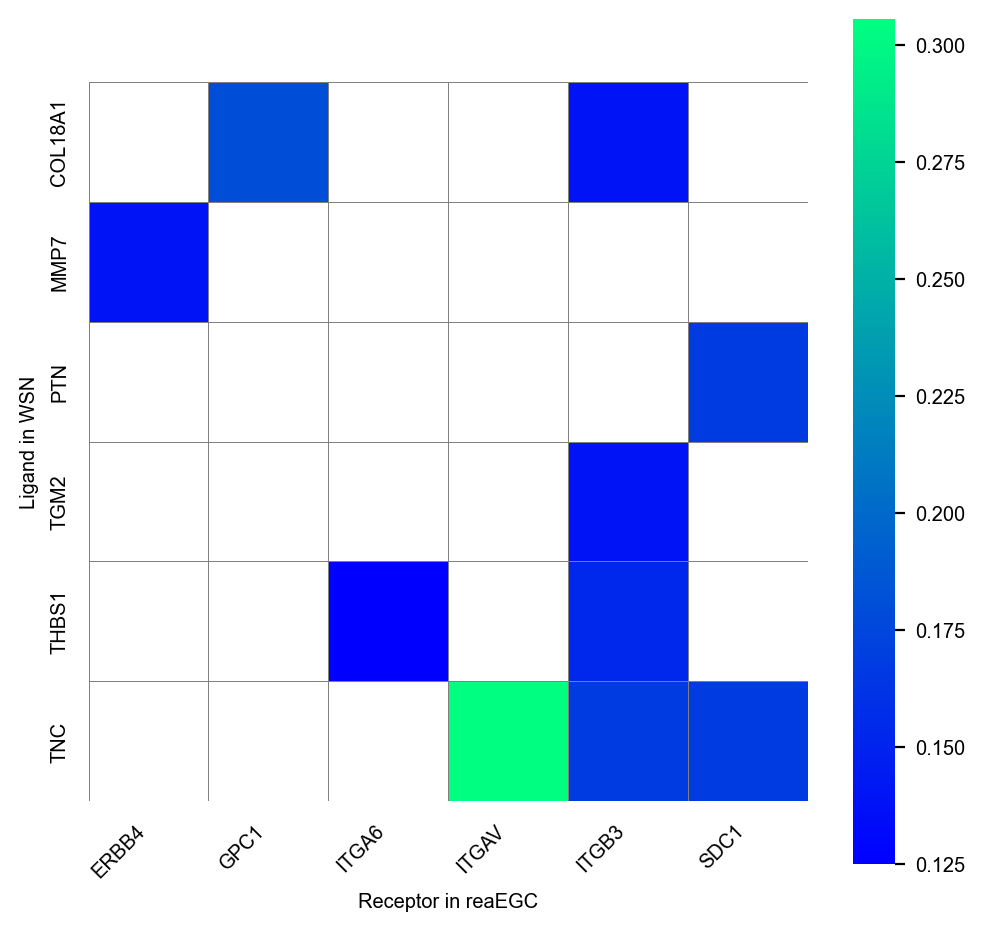

In [14]:
%matplotlib inline
data1 = df.iloc[:, [2, 3, 7]]
test = data1.pivot(index="human_ligand", columns="human_receptor",
                   values="lr_co_exp_ratio").fillna(0)
fig = plt.figure()
fig.set_size_inches(5, 5)
x_label = list(test.columns.tolist())
y_label = list(test.index)
ax = sns.heatmap(test,
                 cmap="winter",
                 square=True,
                 yticklabels=y_label,
                 linecolor='grey',
                 linewidths=0.3,
                 annot_kws={'size': 10, 'weight': 'bold', },
                 xticklabels=x_label,
                 mask=(test < 0.01))
plt.gcf().subplots_adjust(bottom=0.3)
plt.xlabel("Receptor in reaEGC")
plt.ylabel("Ligand in WSN")
ax.set_xticklabels(x_label, rotation=45, ha="right")
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.tight_layout()
#plt.savefig("./figures/2DPI_sub_cci_WSN_ReaEGC_heatmap.pdf", transparent=True)

## (Optional) Loop executes multiple two-cell type interactions.

In the case of multiple cell types interacting in a region, the following code can be run. Here we choose the reigon of injury of 2DPI datasets of axolotl. In this microenvironment, these types of cells(`reaEGC`,`MCG`,`WSN`, `nptxEX`) may interact and cause regeneration to occur. 

In [15]:
a = ['reaEGC', 'MCG', 'WSN', 'nptxEX']

First, construct the celltype pairs in this reigion.

In [16]:
df = pd.DataFrame({
    "celltype_sender": np.repeat(a, len(a)),
    "celltype_receiver": list(a)*len(a),
})
df = df[df['celltype_sender'] != df['celltype_receiver']]
df["celltype_pair"] = df["celltype_sender"].str.cat(
    df["celltype_receiver"], sep="-")
df = df.reset_index(drop=True)
df

,celltype_sender,celltype_receiver,celltype_pair
0,reaEGC,MCG,reaEGC-MCG
1,reaEGC,WSN,reaEGC-WSN
2,reaEGC,nptxEX,reaEGC-nptxEX
3,MCG,reaEGC,MCG-reaEGC
4,MCG,WSN,MCG-WSN
5,MCG,nptxEX,MCG-nptxEX
6,WSN,reaEGC,WSN-reaEGC
7,WSN,MCG,WSN-MCG
8,WSN,nptxEX,WSN-nptxEX
9,nptxEX,reaEGC,nptxEX-reaEGC


Second, calculate the cell pairs and ligand-receptor pairs which interact significantly.

In [17]:
res = {}
# For pairs with no L:R interactions:
dropped = []
for idx, i in enumerate(df['celltype_pair']):
    s, r = i.split(sep='-')
    result = st.tl.find_cci_two_group(adata,
                                      path=db_dir,
                                      species='axolotl',
                                      group='Annotation',
                                      sender_group=s,
                                      receiver_group=r,
                                      filter_lr='outer',
                                      min_pairs=0,
                                      min_pairs_ratio=0,
                                      top=20,)
    if result is not None:
        res[i] = result
    else:
        dropped.append(idx)
    
result = pd.DataFrame(columns=res[df['celltype_pair'][1]]['lr_pair'].columns)
for l in df.index:
    if l not in dropped:
        res[df['celltype_pair'][l]]['lr_pair'] = res[df['celltype_pair'][l]
                                                     ]['lr_pair'].sort_values('lr_co_exp_ratio', ascending=False)[0:3]
        result = pd.concat([result, res[df['celltype_pair'][l]]
                           ['lr_pair']], axis=0, join='outer')

df_result = result.loc[result['lr_co_exp_num'] > 5]
df_result.drop_duplicates(
    subset=['lr_pair', 'sr_pair', ], keep='first', inplace=True)

|-----> 20 ligands for cell type reaEGC_prox with highest fraction of prevalence: ['AMEX60DD005285', 'AMEX60DD001694', 'AMEX60DD022450', 'AMEX60DD034565', 'AMEX60DD004095', 'AMEX60DD015004', 'AMEX60DD028699', 'AMEX60DD018261', 'AMEX60DD013396', 'AMEX60DD049502', 'AMEX60DD038105', 'AMEX60DD049490', 'AMEX60DD008914', 'AMEX60DD001392', 'AMEX60DD052146', 'AMEX60DD055544', 'AMEX60DD006010', 'AMEX60DD024888', 'AMEX60DD002776', 'AMEX60DD050615']. Testing interactions involving these genes.


/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:183: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:207: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type MCG_prox with highest fraction of prevalence: ['AMEX60DDU001005665', 'AMEX60DD041858', 'AMEX60DD001963', 'AMEX60DD051542', 'AMEX60DD031598', 'AMEX60DD014152', 'AMEX60DD045012', 'AMEX60DD047992', 'AMEX60DD046037', 'AMEX60DD032718', 'AMEX60DD001912', 'AMEX60DD045536', 'AMEX60DD054777', 'AMEX60DD055178', 'AMEX60DD037922', 'AMEX60DD055954', 'AMEX60DD033101', 'AMEX60DD018338', 'AMEX60DD051010', 'AMEX60DD009754']. Testing interactions involving these genes.


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 167.01it/s]


|-----> 20 ligands for cell type reaEGC_prox with highest fraction of prevalence: ['AMEX60DD001392', 'AMEX60DD006146', 'AMEX60DD034565', 'AMEX60DD049502', 'AMEX60DD038105', 'AMEX60DD028699', 'AMEX60DD006363', 'AMEX60DD055544', 'AMEX60DD006229', 'AMEX60DD029944', 'AMEX60DD040253', 'AMEX60DD008951', 'AMEX60DD042911', 'AMEX60DD024888', 'AMEX60DD004095', 'AMEX60DD013396', 'AMEX60DD011644', 'AMEX60DD050822', 'AMEX60DD025240', 'AMEX60DD035775']. Testing interactions involving these genes.


/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:183: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:207: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type WSN_prox with highest fraction of prevalence: ['AMEX60DD027855', 'AMEX60DD051542', 'AMEX60DD033799', 'AMEX60DD049635', 'AMEX60DD014152', 'AMEX60DD029894', 'AMEX60DD051881', 'AMEX60DD055551', 'AMEX60DD055467', 'AMEX60DD055675', 'AMEX60DD055776', 'AMEX60DD033101', 'AMEX60DD009754', 'AMEX60DD036540', 'AMEX60DDU001005617', 'AMEX60DD018191', 'AMEX60DD029326', 'AMEX60DD008017', 'AMEX60DD052078', 'AMEX60DD029929']. Testing interactions involving these genes.


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 159.45it/s]


|-----> No cells found in the category reaEGC_prox. Returning None.
|-----> 20 ligands for cell type MCG_prox with highest fraction of prevalence: ['AMEX60DD005285', 'AMEX60DD054671', 'AMEX60DD054218', 'AMEX60DD013396', 'AMEX60DD052549', 'AMEX60DD049259', 'AMEX60DD056132', 'AMEX60DD003767', 'AMEX60DD034707', 'AMEX60DD049502', 'AMEX60DD038339', 'AMEX60DD052070', 'AMEX60DD001392', 'AMEX60DD033981', 'AMEX60DD027633', 'AMEX60DD028699', 'AMEX60DD006619', 'AMEX60DD038300', 'AMEX60DD051636', 'AMEX60DD019011']. Testing interactions involving these genes.


/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:183: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:207: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type reaEGC_prox with highest fraction of prevalence: ['AMEX60DD053573', 'AMEX60DD009877', 'AMEX60DD034378', 'AMEX60DD011957', 'AMEX60DD002586', 'AMEX60DD022211', 'AMEX60DD024484', 'AMEX60DD014152', 'AMEX60DD022702', 'AMEX60DD038156', 'AMEX60DD055675', 'AMEX60DD045536', 'AMEX60DD030160', 'AMEX60DD055776', 'AMEX60DD004560', 'AMEX60DD042070', 'AMEX60DD008017', 'AMEX60DD021741', 'AMEX60DD052063', 'AMEX60DD029929']. Testing interactions involving these genes.


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 162.60it/s]


|-----> 20 ligands for cell type MCG_prox with highest fraction of prevalence: ['AMEX60DD015004', 'AMEX60DD005285', 'AMEX60DD013396', 'AMEX60DD052549', 'AMEX60DD028514', 'AMEX60DD001946', 'AMEX60DD054671', 'AMEX60DD033437', 'AMEX60DD038300', 'AMEX60DD054218', 'AMEX60DD018576', 'AMEX60DD049259', 'AMEX60DD006619', 'AMEX60DD003767', 'AMEX60DD006711', 'AMEX60DD027633', 'AMEX60DD026682', 'AMEX60DD028699', 'AMEX60DD034707', 'AMEX60DD009063']. Testing interactions involving these genes.


/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:183: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:207: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type WSN_prox with highest fraction of prevalence: ['AMEX60DD043057', 'AMEX60DD008551', 'AMEX60DD020537', 'AMEX60DD018528', 'AMEX60DD038203', 'AMEX60DD046905', 'AMEX60DD055153', 'AMEX60DD029894', 'AMEX60DD045012', 'AMEX60DD055467', 'AMEX60DD045536', 'AMEX60DD023546', 'AMEX60DD033101', 'AMEX60DD042067', 'AMEX60DD009754', 'AMEX60DDU001005617', 'AMEX60DD018191', 'AMEX60DD009964', 'AMEX60DD029326', 'AMEX60DD019156']. Testing interactions involving these genes.


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 168.92it/s]


|-----> 20 ligands for cell type MCG_prox with highest fraction of prevalence: ['AMEX60DD054218', 'AMEX60DD028514', 'AMEX60DD054221', 'AMEX60DD052549', 'AMEX60DD018576', 'AMEX60DD049488', 'AMEX60DD013396', 'AMEX60DD006711', 'AMEX60DD009962', 'AMEX60DD027336', 'AMEX60DD042075', 'AMEX60DD009229', 'AMEX60DD051109', 'AMEX60DD045792', 'AMEX60DDU001007321', 'AMEX60DD028699', 'AMEX60DD049338', 'AMEX60DD052070', 'AMEX60DD038300', 'AMEX60DD048288']. Testing interactions involving these genes.


/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:183: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:207: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type nptxEX_prox with highest fraction of prevalence: ['AMEX60DD043057', 'AMEX60DD034378', 'AMEX60DD030013', 'AMEX60DD051542', 'AMEX60DD033799', 'AMEX60DDU001033895', 'AMEX60DD009947', 'AMEX60DD019887', 'AMEX60DD033778', 'AMEX60DD040513', 'AMEX60DD016175', 'AMEX60DD043107', 'AMEX60DD015830', 'AMEX60DD051903', 'AMEX60DD002665', 'AMEX60DD030144', 'AMEX60DD045542', 'AMEX60DD033101', 'AMEX60DD018338', 'AMEX60DD036540']. Testing interactions involving these genes.


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.14it/s]


|-----> 20 ligands for cell type WSN_prox with highest fraction of prevalence: ['AMEX60DD018576', 'AMEX60DD049490', 'AMEX60DD054671', 'AMEX60DD015004', 'AMEX60DD049502', 'AMEX60DD022816', 'AMEX60DD026682', 'AMEX60DD054218', 'AMEX60DD052549', 'AMEX60DD038105', 'AMEX60DD042075', 'AMEX60DD056311', 'AMEX60DD014882', 'AMEX60DD037141', 'AMEX60DD056132', 'AMEX60DDU001002333', 'AMEX60DD050615', 'AMEX60DD024179', 'AMEX60DD028699', 'AMEX60DD002881']. Testing interactions involving these genes.


/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:183: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:207: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type reaEGC_prox with highest fraction of prevalence: ['AMEX60DD027855', 'AMEX60DD015696', 'AMEX60DD018528', 'AMEX60DD034378', 'AMEX60DD011957', 'AMEX60DD011408', 'AMEX60DD024484', 'AMEX60DDU001033895', 'AMEX60DD014152', 'AMEX60DD051881', 'AMEX60DD046037', 'AMEX60DD038156', 'AMEX60DD055675', 'AMEX60DD031636', 'AMEX60DD042348', 'AMEX60DD019369', 'AMEX60DD021356', 'AMEX60DD054983', 'AMEX60DD009964', 'AMEX60DD029929']. Testing interactions involving these genes.


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 155.06it/s]


|-----> 20 ligands for cell type WSN_prox with highest fraction of prevalence: ['AMEX60DD011161', 'AMEX60DD006587', 'AMEX60DD017034', 'AMEX60DD047475', 'AMEX60DD054671', 'AMEX60DD054218', 'AMEX60DD052549', 'AMEX60DD056311', 'AMEX60DD006711', 'AMEX60DD003392', 'AMEX60DD050615', 'AMEX60DD018576', 'AMEX60DD036126', 'AMEX60DD019011', 'AMEX60DD042075', 'AMEX60DD049490', 'AMEX60DD037141', 'AMEX60DD047873', 'AMEX60DD003207', 'AMEX60DD034687']. Testing interactions involving these genes.


/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:183: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:207: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type MCG_prox with highest fraction of prevalence: ['AMEX60DD044042', 'AMEX60DDU001005665', 'AMEX60DD001963', 'AMEX60DD009334', 'AMEX60DD029894', 'AMEX60DD037920', 'AMEX60DD046037', 'AMEX60DD048520', 'AMEX60DD037922', 'AMEX60DD055359', 'AMEX60DD042224', 'AMEX60DD042223', 'AMEX60DD033101', 'AMEX60DD025098', 'AMEX60DD018338', 'AMEX60DDU001005617', 'AMEX60DD005288', 'AMEX60DD027192', 'AMEX60DD029326', 'AMEX60DD009754']. Testing interactions involving these genes.


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 163.08it/s]


|-----> 20 ligands for cell type WSN_prox with highest fraction of prevalence: ['AMEX60DD006587', 'AMEX60DD018576', 'AMEX60DD050451', 'AMEX60DD038105', 'AMEX60DD049490', 'AMEX60DD056311', 'AMEX60DD005869', 'AMEX60DD033480', 'AMEX60DD056132', 'AMEX60DD015004', 'AMEX60DD049502', 'AMEX60DD036126', 'AMEX60DD042075', 'AMEX60DD051109', 'AMEX60DD014882', 'AMEX60DD002185', 'AMEX60DD037141', 'AMEX60DD031350', 'AMEX60DD006711', 'AMEX60DD050615']. Testing interactions involving these genes.


/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:183: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:207: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type nptxEX_prox with highest fraction of prevalence: ['AMEX60DD033647', 'AMEX60DDU001005665', 'AMEX60DD011408', 'AMEX60DD009334', 'AMEX60DD051542', 'AMEX60DDU001033895', 'AMEX60DD022256', 'AMEX60DD009634', 'AMEX60DD016175', 'AMEX60DD054777', 'AMEX60DD030160', 'AMEX60DD015830', 'AMEX60DD030144', 'AMEX60DD030734', 'AMEX60DD002309', 'AMEX60DD045542', 'AMEX60DD033101', 'AMEX60DD008017', 'AMEX60DD052078', 'AMEX60DD029929']. Testing interactions involving these genes.


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 151.44it/s]


|-----> No cells found in the category nptxEX_prox. Returning None.
|-----> 20 ligands for cell type nptxEX_prox with highest fraction of prevalence: ['AMEX60DD047475', 'AMEX60DD007305', 'AMEX60DD056311', 'AMEX60DD050615', 'AMEX60DDU001002333', 'AMEX60DD042075', 'AMEX60DD024179', 'AMEX60DD045327', 'AMEX60DD038300', 'AMEX60DD003212', 'AMEX60DD039130', 'AMEX60DD002185', 'AMEX60DD031350', 'AMEX60DDU001005418', 'AMEX60DD033437', 'AMEX60DD037141', 'AMEX60DD000670', 'AMEX60DD052441', 'AMEX60DD055540', 'AMEX60DD042028']. Testing interactions involving these genes.


/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:183: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:207: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type MCG_prox with highest fraction of prevalence: ['AMEX60DD022047', 'AMEX60DD044042', 'AMEX60DD001963', 'AMEX60DD009334', 'AMEX60DD033799', 'AMEX60DDU001033895', 'AMEX60DD037920', 'AMEX60DD027709', 'AMEX60DD029458', 'AMEX60DD031740', 'AMEX60DD037922', 'AMEX60DD015830', 'AMEX60DD055359', 'AMEX60DD018914', 'AMEX60DD033101', 'AMEX60DD018338', 'AMEX60DD025098', 'AMEX60DDU001005617', 'AMEX60DD018191', 'AMEX60DD052063']. Testing interactions involving these genes.


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 167.22it/s]


|-----> 20 ligands for cell type nptxEX_prox with highest fraction of prevalence: ['AMEX60DD042075', 'AMEX60DD003767', 'AMEX60DD006711', 'AMEX60DD026682', 'AMEX60DD018576', 'AMEX60DD031350', 'AMEX60DD049490', 'AMEX60DD000670', 'AMEX60DD024179', 'AMEX60DD001392', 'AMEX60DD020701', 'AMEX60DDU001007321', 'AMEX60DD048295', 'AMEX60DD006619', 'AMEX60DD049338', 'AMEX60DD013396', 'AMEX60DD039130', 'AMEX60DDU001002333', 'AMEX60DDU001005418', 'AMEX60DD048309']. Testing interactions involving these genes.


/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:183: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.

/mnt/c/Users/danie/spateo_env_test/lib/python3.8/site-packages/spateo/tools/cci_two_cluster.py:207: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type WSN_prox with highest fraction of prevalence: ['AMEX60DD018528', 'AMEX60DD020537', 'AMEX60DD041858', 'AMEX60DD051542', 'AMEX60DD043161', 'AMEX60DD000016', 'AMEX60DD014152', 'AMEX60DDU001007023', 'AMEX60DD051881', 'AMEX60DD055551', 'AMEX60DD055467', 'AMEX60DD023546', 'AMEX60DD022164', 'AMEX60DD025567', 'AMEX60DD033101', 'AMEX60DD042067', 'AMEX60DD036540', 'AMEX60DDU001005617', 'AMEX60DD029326', 'AMEX60DD008017']. Testing interactions involving these genes.


100%|█████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 163.05it/s]
/tmp/ipykernel_222/476618405.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
df_result

,from,to,human_ligand,human_receptor,lr_pair,lr_product,lr_co_exp_num,lr_co_exp_ratio,lr_co_exp_ratio_pvalue,is_significant,sr_pair
85,AMEX60DDU001032566,AMEX60DD055954,MIF,CXCR4,MIF-CXCR4,0.086219,6,0.105263,0.000,True,reaEGC-MCG
2154,AMEX60DD050822,AMEX60DD055305,TNC,ITGAV,TNC-ITGAV,0.420186,22,0.305556,0.000,True,reaEGC-WSN
2321,AMEX60DD055544,AMEX60DD002665,COL18A1,GPC1,COL18A1-GPC1,0.135889,13,0.180556,0.000,True,reaEGC-WSN
734,AMEX60DD050822,AMEX60DD009754,TNC,ITGB3,TNC-ITGB3,0.382080,12,0.166667,0.000,True,reaEGC-WSN
1565,AMEX60DD025587,AMEX60DD052063,L1CAM,EPHB2,L1CAM-EPHB2,0.171647,9,0.209302,0.000,True,MCG-reaEGC
1887,AMEX60DD052070,AMEX60DD054061,C1QB,C1QBP,C1QB-C1QBP,0.265193,8,0.186047,0.000,True,MCG-reaEGC
753,AMEX60DD044302,AMEX60DD024484,EGF,AXL,EGF-AXL,0.144871,7,0.162791,0.000,True,MCG-reaEGC
575,AMEX60DD012285,AMEX60DD033101,THBS1,SDC1,THBS1-SDC1,0.247186,7,0.225806,0.000,True,MCG-WSN
1388,AMEX60DD007022,AMEX60DD033101,PTN,SDC1,PTN-SDC1,0.168189,7,0.225806,0.000,True,MCG-WSN
2306,AMEX60DD007066,AMEX60DD045536,TIMP3,KDR,TIMP3-KDR,0.516178,7,0.225806,0.000,True,MCG-WSN
